In [1]:
import lzma
import pickle

import pandas as pd
from sc2.ids.unit_typeid import UnitTypeId
from sc2.unit import Race
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from phantom.scout_predictor import PlayerVision, ScoutPredictor

In [2]:
df_train = pd.read_parquet("../resources/datasets/scout/train.parquet")
df_test = pd.read_parquet("../resources/datasets/scout/test.parquet")

In [3]:
unit_types = [UnitTypeId.DRONE, UnitTypeId.PROBE, UnitTypeId.SCV]
unit_types = []
model = make_pipeline(
    StandardScaler(),
    MLPRegressor(),
)
predictor = ScoutPredictor(model, unit_types)
predictor.train(df_train)
predictor.prediction_error(df_test)

c:\Users\volke\PycharmProjects\phantom-sc2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1.46829766e+02, 1.84202845e-01, 2.17079298e-01, 2.47192092e-02,
       1.44413649e-03, 1.46519021e-03, 9.01817576e-02, 8.94235443e-03,
       6.18442124e-04, 1.04289950e-01, 1.55085501e-01, 8.65745493e-02,
       5.72377046e-04, 8.23029817e-04, 6.24766783e-02, 2.65857349e-01,
       7.13205531e-04, 1.79722429e-01, 1.41939086e-01, 6.45319616e-02,
       1.17855224e-03, 9.23346089e-04, 1.49085859e-03, 6.82145416e-02,
       5.55515009e-02, 6.29430844e-01, 6.93872632e-04, 1.61032260e-01,
       9.77368055e-01, 8.28341188e-01, 8.67700156e-04, 1.03903853e-01,
       9.09034100e-04, 3.07483700e-01, 9.47214473e-04, 3.14629800e-01,
       2.48397429e-01, 9.96552621e-01, 6.22394005e-04, 1.01599742e-01,
       1.36350375e-01, 9.41112035e-03, 1.23433771e-03, 4.11834992e-01,
       3.72716925e-01, 4.83975780e-01, 6.33859669e-04, 1.88489792e-01,
       3.69939566e-03, 6.37615487e-01, 3.27115071e-01, 1.02332846e-01,
       9.06849979e-04, 9.15985315e-04, 1.66490971e-03, 2.56690046e-03,
      

In [4]:
vision = PlayerVision(
    composition={UnitTypeId.DRONE: 25},
    enemy_composition={UnitTypeId.PROBE: 12},
)
player_races = {
    1: Race.Zerg,
    2: Race.Protoss,
}
enemy_vision = predictor.predict(1000, vision, player_races)
enemy_vision

PlayerVision(composition={UnitTypeId.ADEPTPHASESHIFT: np.float64(-0.004456679064438688), UnitTypeId.HERCPLACEMENT: np.float64(0.0010398221502750777), UnitTypeId.DRONEBURROWED: np.float64(0.0004895114338815368), UnitTypeId.PHOENIX: np.float64(-0.006147533961463225), UnitTypeId.BANELINGBURROWED: np.float64(-0.002092226532416618), UnitTypeId.STARPORTREACTOR: np.float64(-0.00032508337572683305), UnitTypeId.BANELINGNEST: np.float64(0.07136536282110933), UnitTypeId.ENGINEERINGBAY: np.float64(-0.02950126665423095), UnitTypeId.ORACLE: np.float64(0.01838191538980845), UnitTypeId.THOR: np.float64(-0.00038518131325407373), UnitTypeId.NYDUSCANAL: np.float64(0.00020751906391118432), UnitTypeId.HIGHTEMPLAR: np.float64(-0.026759270271097715), UnitTypeId.CHANGELING: np.float64(0.04156027701922327), UnitTypeId.CHANGELINGMARINE: np.float64(6.820068119260916e-05), UnitTypeId.BATTLECRUISER: np.float64(-0.044251353525509636), UnitTypeId.BUNKER: np.float64(0.09001263845619537), UnitTypeId.WARPPRISM: np.floa

In [5]:
predictor.prediction_error(df_test)

array([1.46829766e+02, 1.84202845e-01, 2.17079298e-01, 2.47192092e-02,
       1.44413649e-03, 1.46519021e-03, 9.01817576e-02, 8.94235443e-03,
       6.18442124e-04, 1.04289950e-01, 1.55085501e-01, 8.65745493e-02,
       5.72377046e-04, 8.23029817e-04, 6.24766783e-02, 2.65857349e-01,
       7.13205531e-04, 1.79722429e-01, 1.41939086e-01, 6.45319616e-02,
       1.17855224e-03, 9.23346089e-04, 1.49085859e-03, 6.82145416e-02,
       5.55515009e-02, 6.29430844e-01, 6.93872632e-04, 1.61032260e-01,
       9.77368055e-01, 8.28341188e-01, 8.67700156e-04, 1.03903853e-01,
       9.09034100e-04, 3.07483700e-01, 9.47214473e-04, 3.14629800e-01,
       2.48397429e-01, 9.96552621e-01, 6.22394005e-04, 1.01599742e-01,
       1.36350375e-01, 9.41112035e-03, 1.23433771e-03, 4.11834992e-01,
       3.72716925e-01, 4.83975780e-01, 6.33859669e-04, 1.88489792e-01,
       3.69939566e-03, 6.37615487e-01, 3.27115071e-01, 1.02332846e-01,
       9.06849979e-04, 9.15985315e-04, 1.66490971e-03, 2.56690046e-03,
      

In [6]:
with lzma.open("../models/scout.pkl.xz", "wb") as f:
    pickle.dump(predictor.model, f)

<Axes: xlabel='game_loop', ylabel='count'>

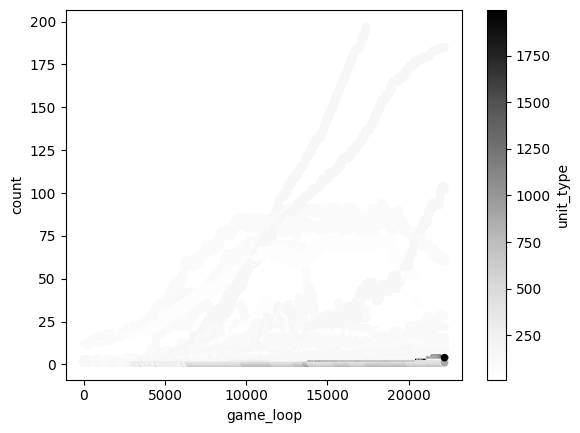

In [7]:
df_test[df_test["player"] == df_test["owner"]].plot.scatter(x="game_loop", y="count", c="unit_type")